# Algorithme de Deustch

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute, transpile
import qiskit.quantum_info as qi
from qiskit import IBMQ
from qiskit.tools import job_monitor
from qiskit.providers.ibmq import least_busy
from FonctionsCommune import *

Fonction qui construit le circuit quantique d'un oracle

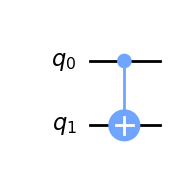

In [2]:
# Le numéro de l'oracle correspond au numéro d'une des quatre fonction binaire présentes à la page 67 des notes de cours
def oracle_f(num_oracle):
    qreg = QuantumRegister(2, "q")
    circuit = QuantumCircuit(qreg)

    if num_oracle == 0:
        return circuit
    elif num_oracle == 1:
        circuit.cx(0, 1)
        return circuit
    elif num_oracle == 2:
        circuit.x(0)
        circuit.cx(0, 1)
        circuit.x(0)
        return circuit
    elif num_oracle == 3:
        circuit.x(1)
        return circuit
    else:
        print("Veuillez entrer un numéro entre 0 et 3 dans la fonction oracle_f()")


oracle_f(1).draw('mpl')

Fonction qui construit le circuit quantique de l'algorithme

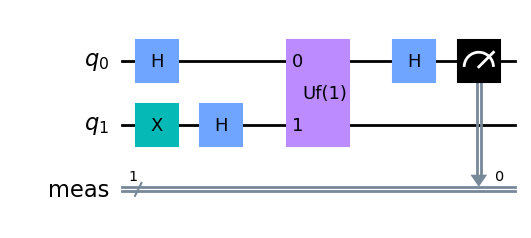

In [3]:
def circuit_Deutch_f(num_oracle):
    qreg = QuantumRegister(2, "q")
    creg = ClassicalRegister(1, "meas")

    circuit = QuantumCircuit(qreg, creg)
    oracle_gate = oracle_f(num_oracle).to_gate(label = f"Uf({num_oracle})") # À changer si on veut cacher le numéro de l'oracle

    circuit.x(1)
    circuit.h([0, 1])
    circuit.append(oracle_gate, [0, 1])
    circuit.h(0)

    circuit.measure(0, 0)

    return circuit

circuit_Deutch_f(1).draw("mpl")

Simulation des circuits quantiques

In [4]:
qasm_simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit_Deutch_f(3), qasm_simulator, shots = 1000)
counts = job.result().get_counts()
print(counts)

{'0': 1000}


Exécution sur un ordinateur quantique de IBM

In [ ]:
#execution_ibmq(circuit_Deutch_f(3))

ibmq_lima
ibmq_belem
ibmq_quito
ibmq_manila
ibm_nairobi
ibm_oslo
Job Status: job is queued (6)     